# Data Cube

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : January 7th 2027  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sys
sys.path.append('../')
import scipy
from scipy import interpolate

In [2]:
import os

In [3]:
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/users/dagoret/anaconda3/bin/python
3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]


In [4]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
!ls data

20200211-holo-4-003-uniformity-datacube.npy


# Utility Functions

In [6]:
def get_list_of_position(arr):
    """
    Return the list of positions
    """
    
    
    ListOfPositions = [] 
    arrsize=len(arr)
    Npos=0
    
    for idx in np.arange(arrsize):
    
        currentposition = (arr[idx][1], arr[idx][2] )
    
        if currentposition not in ListOfPositions:
            ListOfPositions.append(currentposition)
            Npos+=1
            
            
    return Npos, ListOfPositions
    

In [7]:
def get_list_of_transmissions(arr):
    """
    
    """
    
    Narr=len(arr)
    Npos,list_of_position = get_list_of_position(arr)
    
    collectedtransmissions = np.empty(Npos, dtype=np.object)
    
    for idx in np.arange(Narr):   
        currentposition = (arr[idx][1], arr[idx][2])
        currentvalues = (arr[idx][3],arr[idx][4], arr[idx][5] )
  
    
        idx2=-1
        for position in list_of_position:
            idx2+=1
            
            if position == currentposition:
            
                if collectedtransmissions[idx2] == None:
                    collectedtransmissions[idx2] = []
                    collectedtransmissions[idx2].append(currentvalues)
                else:
                    collectedtransmissions[idx2].append(currentvalues)
                       
    
    return collectedtransmissions    
       

# Read Input file

In [8]:
datadir="data"
files_list= os.listdir(datadir)
print(files_list)
filename=files_list[0]
fullfilename=os.path.join(datadir,filename)
print(fullfilename)

['20200211-holo-4-003-uniformity-datacube.npy']
data/20200211-holo-4-003-uniformity-datacube.npy


In [9]:
arr=np.load(fullfilename)

In [10]:
arr.shape

(3443,)

In [11]:
NARR=arr.shape[0]

In [12]:
arr

array([(0,  0.,  0., 400.014, 0.28404813, 7.02226350e-04),
       (0,  0.,  0., 419.989, 0.09057611, 2.22853061e-04),
       (0,  0.,  0., 440.023, 0.02899506, 5.77351450e-05), ...,
       (2, -4., -4., 519.984, 0.06957727, 9.21319092e-05),
       (2, -4., -4., 540.001, 0.05970568, 7.87463120e-05),
       (2, -4., -4., 559.997, 0.03172864, 4.54447038e-05)],
      dtype=[('order', '<i8'), ('dx', '<f8'), ('dy', '<f8'), ('wl', '<f8'), ('DE', '<f8'), ('DE_std', '<f8')])

In [13]:
order0 = arr["order"]== 0
order1 = arr["order"]== 1
order2 = arr["order"]== 2

In [14]:
arr_0 = arr[order0]
arr_1 = arr[order1]
arr_2 = arr[order2]

# Order 1

## List of positions

In [15]:
Npos1,list_of_position_1 = get_list_of_position(arr_1)

In [16]:
Npos1

48

In [17]:
print(list_of_position_1)

[(0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (0.0, 4.0), (0.0, -1.0), (0.0, -2.0), (0.0, -4.0), (1.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 4.0), (1.0, -1.0), (1.0, -2.0), (1.0, -4.0), (2.0, 0.0), (2.0, 1.0), (2.0, 2.0), (2.0, 4.0), (2.0, -1.0), (2.0, -2.0), (2.0, -4.0), (4.0, 0.0), (4.0, 1.0), (4.0, 2.0), (4.0, 4.0), (4.0, -1.0), (4.0, -2.0), (-1.0, 0.0), (-1.0, 1.0), (-1.0, 2.0), (-1.0, 4.0), (-1.0, -1.0), (-1.0, -2.0), (-1.0, -4.0), (-2.0, 0.0), (-2.0, 1.0), (-2.0, 2.0), (-2.0, 4.0), (-2.0, -1.0), (-2.0, -2.0), (-2.0, -4.0), (-4.0, 0.0), (-4.0, 1.0), (-4.0, 2.0), (-4.0, 4.0), (-4.0, -1.0), (-4.0, -2.0), (-4.0, -4.0)]


In [18]:
len(list_of_position_1)

48

## Find the list of different positions

In [19]:
arr_1_ext = get_list_of_transmissions(arr_1)

<ipython-input-7-466b74409715>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


In [20]:
arr_1_ext

array([list([(400.014, 0.08113432020751664, 0.0004253119019335874), (419.989, 0.12204722120477443, 0.0005528540103098845), (440.023, 0.284278472426844, 0.000354299224153873), (459.966, 0.3078574663424993, 0.0003821479165009617), (479.965, 0.3094892134644252, 0.00038400269967797364), (500.021, 0.3117510441015642, 0.0003865603902908834), (519.984, 0.3137440396451491, 0.00038814322283485113), (540.001, 0.3057432204005373, 0.00037755880062014685), (559.997, 0.29572932835378696, 0.00036510376422183976), (579.972, 0.2789954155867061, 0.00034365951476988276), (599.999, 0.27221034565444824, 0.0003353242661302174), (620.003, 0.262478417420918, 0.0003231063036629244), (639.983, 0.25570255947710163, 0.0003143828759407265), (660.012, 0.24401572380960385, 0.0002998520486344919), (680.015, 0.2348525377870017, 0.0002884634375238189), (699.992, 0.22549142907719738, 0.0002765974929935576), (720.015, 0.21550731896352512, 0.0002645092387758762), (740.01, 0.20878474453391851, 0.000255805651175084), (759.9

## Plot transmissions

In [21]:
from matplotlib import cm, colors
values = np.linspace(-4.0, 4.0, 10)
norm = colors.Normalize(vmin=-4.0, vmax=4.0, clip=False)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.bwr)
for value in values:
   print("%.2f" % value, "=",
      "red:%.2f" % mapper.to_rgba(value)[0],
      "green:%.2f" % mapper.to_rgba(value)[1],
      "blue:%.2f" % mapper.to_rgba(value)[2])

-4.00 = red:0.00 green:0.00 blue:1.00
-3.11 = red:0.22 green:0.22 blue:1.00
-2.22 = red:0.44 green:0.44 blue:1.00
-1.33 = red:0.67 green:0.67 blue:1.00
-0.44 = red:0.89 green:0.89 blue:1.00
0.44 = red:1.00 green:0.89 blue:0.89
1.33 = red:1.00 green:0.67 blue:0.67
2.22 = red:1.00 green:0.44 blue:0.44
3.11 = red:1.00 green:0.22 blue:0.22
4.00 = red:1.00 green:0.00 blue:0.00


Text(0.5, 0.98, 'Transmission for Order 1')

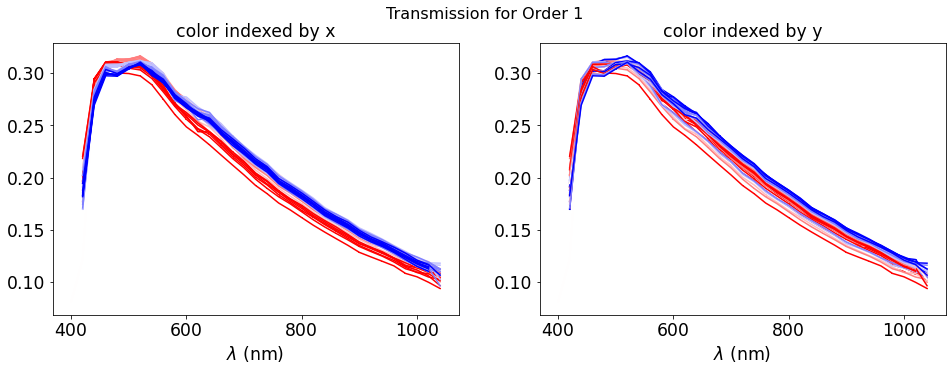

In [22]:
fig=plt.figure(figsize=(16,5))

fig.add_subplot(1,2,1)

for idx in np.arange(Npos1):    
    list_of_datapoints = arr_1_ext[idx]
    x,y = list_of_position_1[idx]
    c = mapper.to_rgba(x)
    wl,eff,eeff = zip(*list_of_datapoints)  
    
    if x==0 and y==0:
        wl0 = wl
        eff0 = eff
        f0 = interpolate.interp1d(wl0, eff0,kind='cubic')
    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)
    plt.errorbar(wl,eff,yerr=eeff,color=c)  
    plt.title("color indexed by x")
    plt.xlabel("$\lambda$ (nm)")
 
fig.add_subplot(1,2,2)

for idx in np.arange(Npos1):    
    list_of_datapoints = arr_1_ext[idx]
    x,y = list_of_position_1[idx]
    c = mapper.to_rgba(y)
    wl,eff,eeff = zip(*list_of_datapoints)    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)  
    plt.errorbar(wl,eff,yerr=eeff,color=c)  
    plt.title("color indexed by y")
    plt.xlabel("$\lambda$ (nm)")
    
plt.suptitle("Transmission for Order 1",fontsize=16)  

Text(0.5, 0.98, 'Transmission ratio for Order 1')

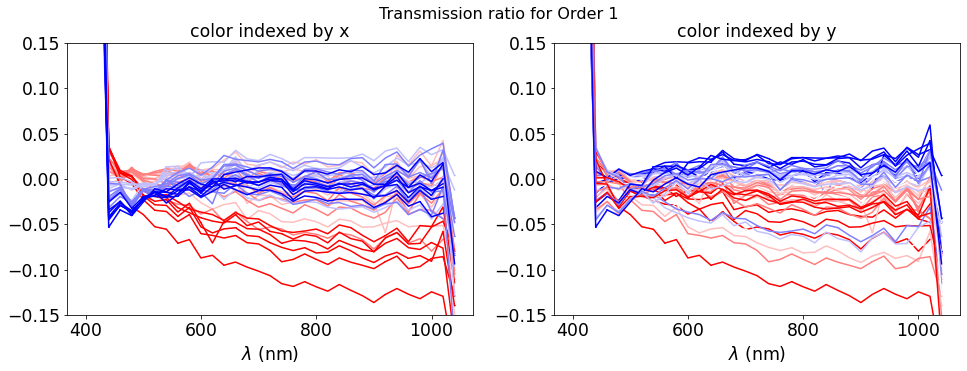

In [24]:
fig=plt.figure(figsize=(16,5))

fig.add_subplot(1,2,1)

for idx in np.arange(Npos1):    
    list_of_datapoints = arr_1_ext[idx]
    x,y = list_of_position_1[idx]
    
        
    c = mapper.to_rgba(x)
    wl,eff,eeff = zip(*list_of_datapoints) 
    
    f = interpolate.interp1d(wl, eff,kind='cubic')
    
    effr = f(wl)/f0(wl)-1 
    eeffr = eeff/f0(wl) 

    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)
    plt.errorbar(wl,effr,yerr=eeff,color=c)  
    plt.title("color indexed by x")
    plt.xlabel("$\lambda$ (nm)")
    plt.ylim(-0.15,0.15)
 
fig.add_subplot(1,2,2)

for idx in np.arange(Npos1):    
    list_of_datapoints = arr_1_ext[idx]
    x,y = list_of_position_1[idx]
    c = mapper.to_rgba(y)
    wl,eff,eeff = zip(*list_of_datapoints)  
    
    f = interpolate.interp1d(wl, eff,kind='cubic')
    
    effr = f(wl)/f0(wl) -1
    eeffr = eeff/f0(wl) 

    
    #plt.errorbar(wl,eff,yerr=eeff,color=c,uplims=True, lolims=True)  
    plt.errorbar(wl,effr,yerr=eeff,color=c)  
    plt.title("color indexed by y")
    plt.xlabel("$\lambda$ (nm)")
    plt.ylim(-0.15,0.15)
    
plt.suptitle("Transmission ratio for Order 1",fontsize=16)  

# Gaussian Processes

In [25]:
arr_1

array([(1,  0.,  0.,  400.014, 0.08113432, 0.00042531),
       (1,  0.,  0.,  419.989, 0.12204722, 0.00055285),
       (1,  0.,  0.,  440.023, 0.28427847, 0.0003543 ), ...,
       (1, -4., -4.,  999.966, 0.12115345, 0.00016043),
       (1, -4., -4., 1019.98 , 0.11694063, 0.00014926),
       (1, -4., -4., 1040.023, 0.10674954, 0.00015927)],
      dtype=[('order', '<i8'), ('dx', '<f8'), ('dy', '<f8'), ('wl', '<f8'), ('DE', '<f8'), ('DE_std', '<f8')])

In [38]:
arr=arr_1
Narr = len(arr)
X = np.zeros((Narr,3))
Y = np.zeros(Narr)
EY = np.zeros(Narr)
for idx in np.arange(Narr):    

    X[idx,0]=arr[idx][1]
    X[idx,1]=arr[idx][2]
    X[idx,2]=arr[idx][3]
    
    Y[idx]=arr[idx][4]
    EY[idx] = arr[idx][5]

In [39]:
X

array([[   0.   ,    0.   ,  400.014],
       [   0.   ,    0.   ,  419.989],
       [   0.   ,    0.   ,  440.023],
       ...,
       [  -4.   ,   -4.   ,  999.966],
       [  -4.   ,   -4.   , 1019.98 ],
       [  -4.   ,   -4.   , 1040.023]])

In [40]:
Y

array([0.08113432, 0.12204722, 0.28427847, ..., 0.12115345, 0.11694063,
       0.10674954])

In [64]:

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel


In [65]:
kernel = ConstantKernel(1.0, constant_value_bounds=(0.5,100) ) * RBF(length_scale=(0.5,0.5,5.0),length_scale_bounds=(0.1, 10))  + WhiteKernel(noise_level=1, noise_level_bounds=(1e-5, 1e1))

In [66]:
gpr = GaussianProcessRegressor(kernel=kernel).fit(X, Y)

/users/dagoret/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.5. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/users/dagoret/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/users/dagoret/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  war